In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
def load_patient_data(patient_id, location):

    wav_file = f'dataset/training_data/{patient_id}_{location}.wav'
    hea_file = f'dataset/training_data/{patient_id}_{location}.hea'
    tsv_file = f'dataset/training_data/{patient_id}_{location}.tsv'
    txt_file = f'dataset/training_data/{patient_id}.txt'
     
    fs, audio = wavfile.read(wav_file)
 
    with open(hea_file, 'r') as f:
        hea_data = f.readlines()
    hea_info = hea_data[0].split()
    fs = int(hea_info[2]) 
     
    segmentation = pd.read_csv(tsv_file, sep='\t', header=None)
    segmentation.columns = ['Start', 'End', 'State']
 
    demographics = {}
    with open(txt_file, 'r') as f:
        txt_data = f.readlines()
    for line in txt_data:
        if line.startswith('#'):
            key, value = line[1:].strip().split(': ')
            demographics[key] = value
    
    return fs, audio, segmentation, demographics

In [3]:
def plot_heart_sound(audio, fs, segmentation, title='Heart Sound Signal', max_time=None):
    time = np.arange(len(audio)) / fs
    
    if max_time is not None: 
        max_idx = int(max_time * fs)
        time = time[:max_idx]
        audio = audio[:max_idx]
        segmentation = segmentation[segmentation['End'] <= max_time]   
    
    plt.figure(figsize=(10, 6))
    plt.plot(time, audio, label='Heart Sound Signal', alpha=0.6)
     
    for _, row in segmentation.iterrows():
        start, end, state = row
        if state == 1:
            plt.axvspan(start, end, color='green', alpha=0.3, label='S1' if 'S1' not in plt.gca().get_legend_handles_labels()[1] else "")
        elif state == 2:
            plt.axvspan(start, end, color='yellow', alpha=0.3, label='Systole' if 'Systole' not in plt.gca().get_legend_handles_labels()[1] else "")
        elif state == 3:
            plt.axvspan(start, end, color='blue', alpha=0.3, label='S2' if 'S2' not in plt.gca().get_legend_handles_labels()[1] else "")
        elif state == 4:
            plt.axvspan(start, end, color='red', alpha=0.3, label='Diastole' if 'Diastole' not in plt.gca().get_legend_handles_labels()[1] else "")
    
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

In [6]:
patient_id = '2530'
location = 'AV'
fs, audio, segmentation, demographics = load_patient_data(patient_id, location)
 
demographics_df = pd.DataFrame(list(demographics.items()), columns=['Attribute', 'Value'])

demographics_df

,Attribute,Value
0,Age,Child
1,Sex,Female
2,Height,98.0
3,Weight,15.9
4,Pregnancy status,False
5,Murmur,Absent
6,Murmur locations,nan
7,Most audible location,nan
8,Systolic murmur timing,nan
9,Systolic murmur shape,nan


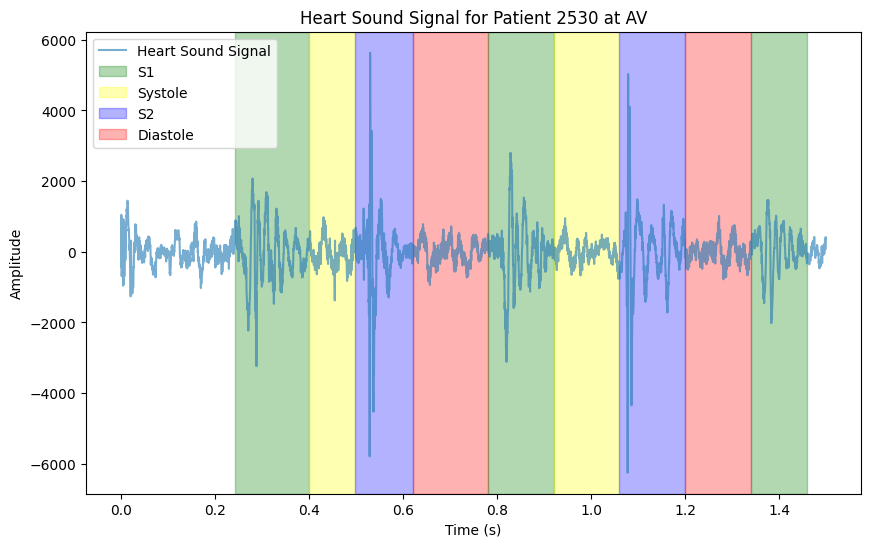

In [9]:
time = 1.5
plot_heart_sound(audio, fs, segmentation, title=f'Heart Sound Signal for Patient {patient_id} at {location}',max_time=time)